<a href="https://colab.research.google.com/github/1013115/KTB_Project/blob/main/RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RAG (Retrieval-Augmented Generation)

기존의 대규모 언어 모델을 확장하여, 주어진 컨텍스트나 질문에 대해 더욱 정확하고 풍부한 정보를 제공하는 방법
- 모델이 학습 데이터에 포함되지 않은 외부 데이터를 실시간으로 검색(retrieval)하고, 이를 바탕으로 답변을 생성(generation)하는 과정을 포함한다.
- 환각을 방지하고, 모델이 최신 정보를 반영하거나 더 넓은 지식을 활용할 수 있게 한다


1. 모델의 기본 구조
- **검색 단계 (Retrieval Phase)**: 사용자의 질문이나 컨텍스트를 입력으로 받아서, 이와 관련된 외부 데이터를 검색하는 단계. 색 엔진이나 데이터베이스 등 다양한 소스에서 필요한 정보를 찾아냄. 검색된 데이터는 질문에 대한 답변을 생성하는데 적합하고 상세한 정보를 포함하는 것을 목표로 함
- **생성 단계 (Generation Phase)**: 검색된 데이터를 기반으로 LLM 모델이 사용자의 질문에 답변을 생성하는 단계. 이 단계에서 모델은 검색된 정보와 기존의 지식을 결합하여, 주어진 질문에 대해 답변을 생성함.

2. RAG 모델의 장점
- 풍부한 정보 제공:
RAG 모델은 검색을 통해 얻은 외부 데이터를 활용하여, 보다 구체적이고 풍부한 정보를 제공할 수 있다.
- 실시간 정보 반영: 최신 데이터를 검색하여 반영함으로써, 모델이 실시간으로 변화하는 정보에 대응할 수 있다.
- 환각 방지: 검색을 통해 실제 데이터에 기반한 답변을 생성함으로써, 환각 현상이 발생할 위험을 줄이고 정확도를 높일 수 있다.


## 1. 데이터 로드(Load Data)
RAG에 사용할 데이터를 불러오는 단계

외부 데이터 소스에서 정보를 수집하고, 필요한 형식으로 변환하여 시스템에 로드함.
예를 들면, 공개 데이터셋, 웹크롤링을 통해 얻는 데이터, 또는 사전에 정의된 자료일 수 있다.

In [1]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 700.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install -U langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.7/383.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 28.0 MB/s eta 0:00:00


In [3]:
!pip install -qU langchain_community beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.2 MB/s eta 0:00:00


In [4]:
# Data Loader - 웹페이지 데이터 가져오기
from langchain_community.document_loaders import WebBaseLoader

# 위키피디아 정책과 지침
url = 'https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EC%A0%95%EC%B1%85%EA%B3%BC_%EC%A7%80%EC%B9%A8'
loader = WebBaseLoader(url)

# 웹페이지 텍스트 -> Documents
docs = loader.load()

print(len(docs))
print(len(docs[0].page_content))
print(docs[0].page_content[5000:6000])


1
13151
해 좀 더 빠르게 강력한 수단을 이용해야 합니다. 특히 정책 문서에 명시된 원칙을 지키지 않는 것은 대부분의 경우 다른 사용자에게 받아들여지지 않습니다 (다른 분들에게 예외 상황임을 설득할 수 있다면 가능하기는 하지만요). 이는 당신을 포함해서 편집자 개개인이 정책과 지침을 직접 집행 및 적용한다는 것을 의미합니다.
특정 사용자가 명백히 정책에 반하는 행동을 하거나 정책과 상충되는 방식으로 지침을 어기는 경우, 특히 의도적이고 지속적으로 그런 행위를 하는 경우 해당 사용자는 관리자의 제재 조치로 일시적, 혹은 영구적으로 편집이 차단될 수 있습니다. 영어판을 비롯한 타 언어판에서는 일반적인 분쟁 해결 절차로 끝낼 수 없는 사안은 중재위원회가 개입하기도 합니다.

문서 내용
정책과 지침의 문서 내용은 처음 읽는 사용자라도 원칙과 규범을 잘 이해할 수 있도록 다음 원칙을 지켜야 합니다.

명확하게 작성하세요. 소수만 알아듣거나 준법률적인 단어, 혹은 지나치게 단순한 표현은 피해야 합니다. 명확하고, 직접적이고, 모호하지 않고, 구체적으로 작성하세요. 지나치게 상투적인 표현이나 일반론은 피하세요. 지침, 도움말 문서 및 기타 정보문 문서에서도 "해야 합니다" 혹은 "하지 말아야 합니다" 같이 직접적인 표현을 굳이 꺼릴 필요는 없습니다.
가능한 간결하게, 너무 단순하지는 않게. 정책이 중언부언하면 오해를 부릅니다. 불필요한 말은 생략하세요. 직접적이고 간결한 설명이 마구잡이식 예시 나열보다 더 이해하기 쉽습니다. 각주나 관련 문서 링크를 이용하여 더 상세히 설명할 수도 있습니다.
규칙을 만든 의도를 강조하세요. 사용자들이 상식대로 행동하리라 기대하세요. 정책의 의도가 명료하다면, 추가 설명은 필요 없죠. 즉 규칙을 '어떻게' 지키는지와 더불어 '왜' 지켜야 하는지 확실하게 밝혀야 합니다.
범위는 분명히, 중복은 피하기. 되도록 앞부분에서 정책 및 지침의 목적과 범위를 분명하게 밝혀야 합니다. 독자 대부분은 도입부 초반만 읽고 나가버리니까요. 각 정책 문서

## 2. 텍스트 분할 (Text Split)

불러온 데이터를 작은 크기의 단위(chunk)로 분할하는 과정. 자연어처리 기술을 활용하여 큰 문서를 처리가 쉽도록 문단, 문장 또는 구 단위로 나누는 작업

LLM 모델이나 API의 입력 크기에 대한 제한이 있기 때문에, 제한에 걸리지 않도록 적정한 크기로 텍스트의 길이를 줄일 필요가 있다. 그리고, 프롬프트가 지나치게 길어질 경우 중요한 정보가 상대적으로 희석되는 문제가 있을 수도 있다. 따라서, 적정한 크기로 텍스트를 분할하는 과정이 필요하다.

In [5]:
# Text Split (Documents -> small chunks: Documents)
from langchain.text_splitter import RecursiveCharacterTextSplitter
# 텍스트 분할 도구 - 12552 개의 문자로 이루어진 긴 문장을 최대 1000글자 단위로 분할

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)

print(len(splits))
print(splits[10])


18
page_content='제안과 채택
 백:아님 § 관료주의  문서를 참고하십시오. 단축백:제안
제안 문서란 정책과 지침으로 채택하자고 의견을 묻는 문서이나 아직 위키백과 내에 받아들여지는 원칙으로 확립되지는 않은 문서입니다. {{제안}} 틀을 붙여 공동체 내에서 정책이나 지침으로 채택할 지 의견을 물을 수 있습니다. 제안 문서는 정책과 지침이 아니므로 아무리 실제 있는 정책이나 지침을 요약하거나 인용해서 다른 문서에 쓴다고 해도 함부로 정책이나 지침 틀을 붙여서는 안 됩니다.
'제안'은 완전 새로운 원칙이라기보다, 기존의 불문율이나 토론 총의의 문서를 통한 구체화에 가깝습니다. 많은 사람들이 쉽게 제안을 받아들이도록 하기 위해서는, 기초적인 원칙을 우선 정하고 기본 틀을 짜야 합니다. 정책과 지침의 기본 원칙은 "왜 지켜야 하는가?", "어떻게 지켜야 하는가?" 두 가지입니다. 특정 원칙을 정책이나 지침으로 확립하기 위해서는 우선 저 두 가지 물음에 성실하게 답하는 제안 문서를 작성해야 합니다.
좋은 아이디어를 싣기 위해 사랑방이나 관련 위키프로젝트에 도움을 구해 피드백을 요청할 수 있습니다. 이 과정에서 공동체가 어느 정도 받아들일 수 있는 원칙이 구체화됩니다. 많은 이와의 토론을 통해 공감대가 형성되고 제안을 개선할 수 있습니다.
정책이나 지침은 위키백과 내의 모든 편집자들에게 적용되는 원칙이므로 높은 수준의 총의가 요구됩니다. 제안 문서가 잘 짜여졌고 충분히 논의되었다면, 더 많은 공동체의 편집자와 논의를 하기 위해 승격 제안을 올려야 합니다. 제안 문서 맨 위에 {{제안}}을 붙여 제안 안건임을 알려주고, 토론 문서에 {{의견 요청}}을 붙인 뒤 채택 제안에 관한 토론 문단을 새로 만들면 됩니다. 많은 편집자들에게 알리기 위해 관련 내용을 {{위키백과 소식}}에 올리고 사랑방에 이를 공지해야 하며, 합의가 있을 경우 미디어위키의 sitenotice(위키백과 최상단에 노출되는 구역)에 공지할 수도 있습니다.' metadata={'source': '

In [6]:
# page_content 속성 - 분할된 텍스트 조각이 들어있음
splits[10].page_content

'제안과 채택\n\xa0백:아님 §\xa0관료주의  문서를 참고하십시오. 단축백:제안\n제안 문서란 정책과 지침으로 채택하자고 의견을 묻는 문서이나 아직 위키백과 내에 받아들여지는 원칙으로 확립되지는 않은 문서입니다. {{제안}} 틀을 붙여 공동체 내에서 정책이나 지침으로 채택할 지 의견을 물을 수 있습니다. 제안 문서는 정책과 지침이 아니므로 아무리 실제 있는 정책이나 지침을 요약하거나 인용해서 다른 문서에 쓴다고 해도 함부로 정책이나 지침 틀을 붙여서는 안 됩니다.\n\'제안\'은 완전 새로운 원칙이라기보다, 기존의 불문율이나 토론 총의의 문서를 통한 구체화에 가깝습니다. 많은 사람들이 쉽게 제안을 받아들이도록 하기 위해서는, 기초적인 원칙을 우선 정하고 기본 틀을 짜야 합니다. 정책과 지침의 기본 원칙은 "왜 지켜야 하는가?", "어떻게 지켜야 하는가?" 두 가지입니다. 특정 원칙을 정책이나 지침으로 확립하기 위해서는 우선 저 두 가지 물음에 성실하게 답하는 제안 문서를 작성해야 합니다.\n좋은 아이디어를 싣기 위해 사랑방이나 관련 위키프로젝트에 도움을 구해 피드백을 요청할 수 있습니다. 이 과정에서 공동체가 어느 정도 받아들일 수 있는 원칙이 구체화됩니다. 많은 이와의 토론을 통해 공감대가 형성되고 제안을 개선할 수 있습니다.\n정책이나 지침은 위키백과 내의 모든 편집자들에게 적용되는 원칙이므로 높은 수준의 총의가 요구됩니다. 제안 문서가 잘 짜여졌고 충분히 논의되었다면, 더 많은 공동체의 편집자와 논의를 하기 위해 승격 제안을 올려야 합니다. 제안 문서 맨 위에 {{제안}}을 붙여 제안 안건임을 알려주고, 토론 문서에 {{의견 요청}}을 붙인 뒤 채택 제안에 관한 토론 문단을 새로 만들면 됩니다. 많은 편집자들에게 알리기 위해 관련 내용을 {{위키백과 소식}}에 올리고 사랑방에 이를 공지해야 하며, 합의가 있을 경우 미디어위키의 sitenotice(위키백과 최상단에 노출되는 구역)에 공지할 수도 있습니다.'

In [7]:
# metadata 속성 - 원본 문서의 정보 포함
splits[10].metadata

{'source': 'https://ko.wikipedia.org/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EC%A0%95%EC%B1%85%EA%B3%BC_%EC%A7%80%EC%B9%A8',
 'title': '위키백과:정책과 지침 - 위키백과, 우리 모두의 백과사전',
 'language': 'ko'}

## 3. 인덱싱(Indexing)

분할된 텍스트를 검색 가능한 형태로 만드는 단계

인덱싱은 검색 시간을 단축시키고, 검색의 정확도를 높이는데 중요한 역할을 한다.

LangChain 라이브러리를 사용하여 텍스트를 임베딩으로 변환하고, 이를 저장한 후, 저장된 임베딩을 기반으로 유사성 검색을 수행하는 과정을 보여준다.

openai의 임베딩 모델을 사용하여 텍스트를 벡터로 변환하고, 이를 Chroma 벡터 저정소에 저장한다.
 vectorstore.similarity_search 메소드는 주어진 쿼리 문자열("격하 과정에 대해서 설명해주세요.")에 대해 저장된 문서들 중에서 가장 유사한 문서들을 찾아낸다. 이때, 유사성은 임베딩 간의 거리 (또는 유사도)로 계산된다.



In [8]:
import os
from google.colab import userdata
#os.environ['OPENAI_API_KEY'] = 'OPEN_API_KEY'
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [9]:
!pip install -U langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 603.0/603.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.0 MB/s eta 0:00:

In [10]:
# Indexing (Texts -> Embedding -> Store)
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=splits,
                                    embedding=OpenAIEmbeddings())

docs = vectorstore.similarity_search("격하 과정에 대해서 설명해주세요.")
print(len(docs))
print(docs[0].page_content)


4
격하
특정 정책이나 지침이 편집 관행이나 공동체 규범이 바뀌며 쓸모없어질 수 있고, 다른 문서가 개선되어 내용이 중복될 수 있으며, 불필요한 내용이 증식할 수도 있습니다. 이 경우 편집자들은 정책을 지침으로 격하하거나, 정책 또는 지침을 보충 설명, 정보문, 수필 또는 중단 문서로 격하할 것을 제안할 수 있습니다. 
격하 과정은 채택 과정과 비슷합니다. 일반적으로 토론 문서 내 논의가 시작되고 프로젝트 문서 상단에 {{새로운 토론|문단=진행 중인 토론 문단}} 틀을 붙여 공동체의 참여를 요청합니다. 논의가 충분히 이루어진 후, 제3의 편집자가 토론을 종료하고 평가한 후 상태 변경 총의가 형성되었는지 판단해야 합니다. 폐지된 정책이나 지침은 최상단에 {{중단}} 틀을 붙여 더 이상 사용하지 않는 정책/지침임을 알립니다.
소수의 공동체 인원만 지지하는 수필, 정보문 및 기타 비공식 문서는 일반적으로 주된 작성자의 사용자 이름공간으로 이동합니다. 이러한 논의는 일반적으로 해당 문서의 토론란에서 이루어지며, 간혹 위키백과:의견 요청을 통해 처리되기도 합니다.

같이 보기
위키백과:위키백과의 정책과 지침 목록
위키백과:의견 요청
수필

위키백과:제품, 절차, 정책
위키백과:위키백과 공동체의 기대와 규범
기타 링크


## 4. 검색(Retrieval)

사용자의 질문이나 주어진 컨텍스트에 가장 관련된 정보를 찾아내는 과정. 사용자의 입력을 바탕으로 쿼리를 생성하고, 인덱싱된 데이터에서 가장 관련성 높은 정보를 검색함. LangChain의 retriever 메소드를 사용.

## 5. 생성(Generation)

검색된 정보를 바탕으로 사용자의 질문에 답변을 생성하는 최종 단계. LLM 모델에 검색 결과와 함께 사용자의 입력을 전달. 모델은 사전 학습된 지식과 검색 결과를 결합하여 주어진 질문에 가장 적절한 답변을 생성함


`format_docs` 함수는 검색된 문서들을 하나의 문자열로 반환

In [11]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

# Prompt
template = '''Answer the question based only on the following context:
{context}

Question: {question}
'''

prompt = ChatPromptTemplate.from_template(template)

# LLM
model = ChatOpenAI(model='gpt-4o-mini', temperature=0)

# Rretriever
retriever = vectorstore.as_retriever()

# Combine Documents
def format_docs(docs):
    return '\n\n'.join(doc.page_content for doc in docs)

# RAG Chain 연결
rag_chain = (
    {'context': retriever | format_docs, 'question': RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

# Chain 실행
rag_chain.invoke("격하 과정에 대해서 설명해주세요.")


'격하 과정은 특정 정책이나 지침이 더 이상 유효하지 않거나 필요하지 않다고 판단될 때 진행됩니다. 이 과정은 채택 과정과 유사하게 진행되며, 일반적으로 토론 문서 내에서 논의가 시작됩니다. 편집자들은 정책을 지침으로 격하하거나, 정책 또는 지침을 보충 설명, 정보문, 수필 또는 중단 문서로 격하할 것을 제안할 수 있습니다.\n\n토론이 시작되면, 프로젝트 문서 상단에 {{새로운 토론|문단=진행 중인 토론 문단}} 틀을 붙여 공동체의 참여를 요청합니다. 충분한 논의가 이루어진 후, 제3의 편집자가 토론을 종료하고 평가하여 상태 변경에 대한 총의가 형성되었는지 판단합니다. 격하된 정책이나 지침은 최상단에 {{중단}} 틀을 붙여 더 이상 사용되지 않음을 알립니다.\n\n소수의 공동체 인원만 지지하는 문서는 일반적으로 주된 작성자의 사용자 이름공간으로 이동되며, 이러한 논의는 해당 문서의 토론란에서 이루어지거나 위키백과:의견 요청을 통해 처리될 수 있습니다.'

# Document Loader

## 웹 문서

- `WebBaseLoader`는 특정 웹페이지의 내용을 로드하고 파싱하기 위해 설계된 클래스이다.

- `web_paths`매개변수는 로드할 웹 페이지의 URL을 단일 문자열 또는 여러 개의 URL을 시퀀스 배열로 지정할 수 있다. 여기서 파이썬 튜블 형태로 2개의 url을 사용하고 있다.

- `bs_kwargs`매개변수는 BeautifulSoup을 사용하여 HTML을 파싱할 때 사용되는 인자들을 딕셔너리 형태로 제공한다. `bs4.SoupStrainer`를 사용하여 특정 클래스 이름을 가진 HTML 요소만 파싱하도록 지정하고 있다.

- docs 변수에는 로드된 문서들의 배열리 할당된다. 각 페이지 별로 별도의 Document 객체로 변환되어 2개의 문서가 생성된다.

In [12]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

url1 = "https://blog.langchain.dev/customers-replit/"
url2 = "https://blog.langchain.dev/langgraph-v0-2/"

loader = WebBaseLoader(
    web_paths=(url1, url2),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("article-header","article-content")
        )
    ),
)

docs = loader.load()

len(docs)

2

In [112]:
docs[0]

Document(metadata={'source': 'https://blog.langchain.dev/customers-replit/'}, page_content='\nReplit is at the forefront of AI innovation with its platform that simplifies writing, running, and collaborating on code for over 30+ million developers. They recently released Replit Agent, which immediately went viral due to the incredible applications people could easily create with this tool.Behind the scenes, Replit Agent has a complex workflow built on LangGraph, which enables a highly custom agentic workflow with a high-degree of control and parallel execution. A major benefit of using LangGraph was the seamless integration with LangSmith, which gave Replit deep visibility into their agent interactions to debug tricky issues.\xa0The level of complexity required for Replit Agent also pushed the boundaries of LangSmith. The LangChain and Replit teams worked closely together to add functionality to LangSmith that would satisfy their LLM observability needs. Specifically, there were three 

## 텍스트 문서

`TextLoader`를 사용하여 텍스트 파일을 불러올 수 있다. 텍스트 파일의 내용을 랭체인의 Document 객체로 변환하고 이를 리스트 형태로 반환한다.

 TextLoader는 파일 경로를 인자로 받아 해당 파일의 내용을 불러온 후, load 메소드를 통해 파일의 내용을 담고 있는 Document 객체로 변환


In [13]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader('history.txt')
data = loader.load()

print(type(data))
print(len(data))

<class 'list'>
1


In [14]:
data

[Document(metadata={'source': 'history.txt'}, page_content='한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.\n\n7세기 말, 신라는 당나라와 연합하여 백제와 고구려를 차례로 정복하고, 한반도 최초의 통일 국가인 통일 신라를 건립합니다. 이 시기에 신라는 불교를 국교로 채택하며 문화와 예술이 크게 발전했습니다.\n\n그러나 10세기에 이르러 신라는 내부의 분열과 외부의 압력으로 쇠퇴하고, 이를 대체하여 고려가 성립됩니다. 고려 시대에는 과거제도의 도입과 더불어 청자 등 고려 고유의 문화가 꽃피었습니다.\n\n조선은 1392년 이성계에 의해 건국되어, 1910년까지 이어졌습니다. 조선 초기에는 세종대왕이 한글을 창제하여 백성들의 문해율을 높이는 등 문화적, 과학적 성취가 이루어졌습니다. 그러나 조선 후기에는 내부적으로 실학의 발전과 함께 사회적 변화가 모색되었으나, 외부로부터의 압력은 점차 커져만 갔습니다.\n\n19세기 말부터 20세기 초에 걸쳐 한국은 제국주의 열강의 침략을 받으며 많은 시련을 겪었습니다. 1910년, 한국은 일본에 의해 강제로 병합되어 35년간의 식민 지배를 받게 됩니다. 이 기간 동안 한국인들은 독립을 위한

In [15]:
len(data[0].page_content)

1234

In [16]:
data[0].metadata

{'source': 'history.txt'}

## 디렉토리 폴더

- DirectoryLoader를 사용하여 디렉토리 내의 모든 문서를 로드할 수 있다.

- DirectoryLoader 인스턴스를 생성할 때 문서가 있는 디렉토리의 경로와 해당 문서를 식별할 수 있는 glob 패턴 지정

  이때 문서를 읽고 처리하기 위해서는 `UnstructuredLoader`가 내부적으로 사용됨.

- DirectoryLoader가 지정된 패턴에 맞는 모든 파일을 로드하고, 각 파일의 내용을 리스트의 각 항목으로 저장

In [17]:
!pip install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.5 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=4b738275207aa394c4d4faa67cf6bd7ef4868a4505c4e46212f2534ce8abdef6
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [18]:
import os
from glob import glob

files = glob(os.path.join('./','*.txt'))
files

['./history.txt', './places.txt']

In [19]:
from langchain_community.document_loaders import DirectoryLoader

loader = DirectoryLoader(path='./', glob='*.txt', loader_cls=TextLoader)

data = loader.load()

len(data)


2

In [20]:
data[0]

Document(metadata={'source': 'history.txt'}, page_content='한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.\n\n7세기 말, 신라는 당나라와 연합하여 백제와 고구려를 차례로 정복하고, 한반도 최초의 통일 국가인 통일 신라를 건립합니다. 이 시기에 신라는 불교를 국교로 채택하며 문화와 예술이 크게 발전했습니다.\n\n그러나 10세기에 이르러 신라는 내부의 분열과 외부의 압력으로 쇠퇴하고, 이를 대체하여 고려가 성립됩니다. 고려 시대에는 과거제도의 도입과 더불어 청자 등 고려 고유의 문화가 꽃피었습니다.\n\n조선은 1392년 이성계에 의해 건국되어, 1910년까지 이어졌습니다. 조선 초기에는 세종대왕이 한글을 창제하여 백성들의 문해율을 높이는 등 문화적, 과학적 성취가 이루어졌습니다. 그러나 조선 후기에는 내부적으로 실학의 발전과 함께 사회적 변화가 모색되었으나, 외부로부터의 압력은 점차 커져만 갔습니다.\n\n19세기 말부터 20세기 초에 걸쳐 한국은 제국주의 열강의 침략을 받으며 많은 시련을 겪었습니다. 1910년, 한국은 일본에 의해 강제로 병합되어 35년간의 식민 지배를 받게 됩니다. 이 기간 동안 한국인들은 독립을 위한 

## CSV 문서

CSV 파일의 각 행을 추출하여 서로 다른 Document 객체로 변환. 이를 문서 객체로 이루어진 리스트 형태로 반환.

In [21]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path='한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949')
data = loader.load()

len(data)

143

In [23]:
data[0]

Document(metadata={'source': '2004-01-01', 'row': 0}, page_content='연도: 2004-01-01\n전국소득대비 주택가격 비율: 4.21\n서울소득대비 주택가격 비율: 4.89\n부산소득대비 주택가격 비율: 3.95\n대구소득대비 주택가격 비율: 3.73\n인천소득대비 주택가격 비율: 4.65\n광주소득대비 주택가격 비율: 2.81\n대전소득대비 주택가격 비율: 4.68\n울산소득대비 주택가격 비율: 2.66\n세종소득대비 주택가격 비율: 0\n경기소득대비 주택가격 비율: 4.17\n강원소득대비 주택가격 비율: 2.49\n충북소득대비 주택가격 비율: 2.62\n충남소득대비 주택가격 비율: 2.17\n전북소득대비 주택가격 비율: 3.12\n전남소득대비 주택가격 비율: 2.12\n경북소득대비 주택가격 비율: 2.12\n경남소득대비 주택가격 비율: 3.81\n제주소득대비 주택가격 비율: 2.99\n전국평균 대출금액  평균 연소득: 2.36\n서울평균 대출금액  평균 연소득: 2.61\n부산평균 대출금액  평균 연소득: 2.35\n대구평균 대출금액  평균 연소득: 2.24\n인천평균 대출금액  평균 연소득: 2.7\n광주평균 대출금액  평균 연소득: 1.6\n대전평균 대출금액  평균 연소득: 2.26\n울산평균 대출금액  평균 연소득: 1.67\n세종평균 대출금액  평균 연소득: 0\n경기평균 대출금액  평균 연소득: 2.42\n강원평균 대출금액  평균 연소득: 1.44\n충북평균 대출금액  평균 연소득: 1.53\n충남평균 대출금액  평균 연소득: 1.21\n전북평균 대출금액  평균 연소득: 1.9\n전남평균 대출금액  평균 연소득: 1.42\n경북평균 대출금액  평균 연소득: 1.31\n경남평균 대출금액  평균 연소득: 2.06\n제주평균 대출금액  평균 연소득: 1.28')

**특정 출처 정보를 특정 필드로 지정**

In [22]:
loader = CSVLoader(file_path='한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949',
                   source_column='연도')

data = loader.load()

data[0]

Document(metadata={'source': '2004-01-01', 'row': 0}, page_content='연도: 2004-01-01\n전국소득대비 주택가격 비율: 4.21\n서울소득대비 주택가격 비율: 4.89\n부산소득대비 주택가격 비율: 3.95\n대구소득대비 주택가격 비율: 3.73\n인천소득대비 주택가격 비율: 4.65\n광주소득대비 주택가격 비율: 2.81\n대전소득대비 주택가격 비율: 4.68\n울산소득대비 주택가격 비율: 2.66\n세종소득대비 주택가격 비율: 0\n경기소득대비 주택가격 비율: 4.17\n강원소득대비 주택가격 비율: 2.49\n충북소득대비 주택가격 비율: 2.62\n충남소득대비 주택가격 비율: 2.17\n전북소득대비 주택가격 비율: 3.12\n전남소득대비 주택가격 비율: 2.12\n경북소득대비 주택가격 비율: 2.12\n경남소득대비 주택가격 비율: 3.81\n제주소득대비 주택가격 비율: 2.99\n전국평균 대출금액  평균 연소득: 2.36\n서울평균 대출금액  평균 연소득: 2.61\n부산평균 대출금액  평균 연소득: 2.35\n대구평균 대출금액  평균 연소득: 2.24\n인천평균 대출금액  평균 연소득: 2.7\n광주평균 대출금액  평균 연소득: 1.6\n대전평균 대출금액  평균 연소득: 2.26\n울산평균 대출금액  평균 연소득: 1.67\n세종평균 대출금액  평균 연소득: 0\n경기평균 대출금액  평균 연소득: 2.42\n강원평균 대출금액  평균 연소득: 1.44\n충북평균 대출금액  평균 연소득: 1.53\n충남평균 대출금액  평균 연소득: 1.21\n전북평균 대출금액  평균 연소득: 1.9\n전남평균 대출금액  평균 연소득: 1.42\n경북평균 대출금액  평균 연소득: 1.31\n경남평균 대출금액  평균 연소득: 2.06\n제주평균 대출금액  평균 연소득: 1.28')

**CSV 파싱 옵션 지정**

csv_args 매개변수를 통해 지정. csv_args는 파이썬 표준 라이브러리인 csv모듈에 전달될 인자를 담는 딕셔너리

구분자로 줄바꿈, 콤마 비교

In [24]:
loader = CSVLoader(file_path='한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949',
                   csv_args={
                       'delimiter': '\n',
                   })

data = loader.load()

data[0]

Document(metadata={'source': '한국주택금융공사_주택금융관련_지수_20160101.csv', 'row': 0}, page_content='연도,전국소득대비 주택가격 비율,서울소득대비 주택가격 비율,부산소득대비 주택가격 비율,대구소득대비 주택가격 비율,인천소득대비 주택가격 비율,광주소득대비 주택가격 비율,대전소득대비 주택가격 비율,울산소득대비 주택가격 비율,세종소득대비 주택가격 비율,경기소득대비 주택가격 비율,강원소득대비 주택가격 비율,충북소득대비 주택가격 비율,충남소득대비 주택가격 비율,전북소득대비 주택가격 비율,전남소득대비 주택가격 비율,경북소득대비 주택가격 비율,경남소득대비 주택가격 비율,제주소득대비 주택가격 비율,전국평균 대출금액  평균 연소득,서울평균 대출금액  평균 연소득,부산평균 대출금액  평균 연소득,대구평균 대출금액  평균 연소득,인천평균 대출금액  평균 연소득,광주평균 대출금액  평균 연소득,대전평균 대출금액  평균 연소득,울산평균 대출금액  평균 연소득,세종평균 대출금액  평균 연소득,경기평균 대출금액  평균 연소득,강원평균 대출금액  평균 연소득,충북평균 대출금액  평균 연소득,충남평균 대출금액  평균 연소득,전북평균 대출금액  평균 연소득,전남평균 대출금액  평균 연소득,경북평균 대출금액  평균 연소득,경남평균 대출금액  평균 연소득,제주평균 대출금액  평균 연소득: 2004-01-01,4.21,4.89,3.95,3.73,4.65,2.81,4.68,2.66,0,4.17,2.49,2.62,2.17,3.12,2.12,2.12,3.81,2.99,2.36,2.61,2.35,2.24,2.7,1.6,2.26,1.67,0,2.42,1.44,1.53,1.21,1.9,1.42,1.31,2.06,1.28')

# Text Splitter

LangChain에서 지원하는 긴 문서를 작은 단위인 청크(chunk)로 나누는 텍스트 분리 도구

이렇게 문서를 작은 조각으로 나누는 이유는 LLM 모델의 입력 토근의 개수가 정해져 있기 때문. 허용 한도를 넘는 텍스트는 모델에서 입력으로 처리할 수 없게 된다.

LangChain이 지원하는 텍스트 분리기는 분할하려는 텍스트 유형과 사용 사례에 맞춰 선택할 수 있는 다양항 옵션이 제공된다.
1. 텍스트가 어떻게 분리되는지 - 텍스트를 나눌 때 각 청크가 독립적으로 의미를 갖도록 나눠야 하낟. 이를 위해, 문장, 구절, 단락 등 문서 구조를 기준으로 나눌 수 있다.
2. 청크 크기가 어떻게 측정되는지 - 각 chunk의 크기를 직접 조정할 수 있다. LLM 모델의 입력 크기와 비용 등을 종합적으로 고려하여 애플리케이션에 적합한 최적 크기를 결정하는 기준이다. 예를들면, 단어 수, 문자 수 등을 기준으로 나눌 수 있다.

## CharacterTextSplitter

TextLoader 클래스는 특정 파일에서 텍스트를 로드해서 Document 객체로 변환한다.

In [25]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader('history.txt')
data = loader.load()

print(len(data[0].page_content))
data[0].page_content


1234


'한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.\n\n7세기 말, 신라는 당나라와 연합하여 백제와 고구려를 차례로 정복하고, 한반도 최초의 통일 국가인 통일 신라를 건립합니다. 이 시기에 신라는 불교를 국교로 채택하며 문화와 예술이 크게 발전했습니다.\n\n그러나 10세기에 이르러 신라는 내부의 분열과 외부의 압력으로 쇠퇴하고, 이를 대체하여 고려가 성립됩니다. 고려 시대에는 과거제도의 도입과 더불어 청자 등 고려 고유의 문화가 꽃피었습니다.\n\n조선은 1392년 이성계에 의해 건국되어, 1910년까지 이어졌습니다. 조선 초기에는 세종대왕이 한글을 창제하여 백성들의 문해율을 높이는 등 문화적, 과학적 성취가 이루어졌습니다. 그러나 조선 후기에는 내부적으로 실학의 발전과 함께 사회적 변화가 모색되었으나, 외부로부터의 압력은 점차 커져만 갔습니다.\n\n19세기 말부터 20세기 초에 걸쳐 한국은 제국주의 열강의 침략을 받으며 많은 시련을 겪었습니다. 1910년, 한국은 일본에 의해 강제로 병합되어 35년간의 식민 지배를 받게 됩니다. 이 기간 동안 한국인들은 독립을 위한 다양한 운동을 전개했으며, 이는 1945년 일본의 패망으로 이어지는 독립으로 결실을 맺었습니다.\n\n해

### 1. 문서를 개별 문자 단위로 나누기 (separator ="")

CharacterTextSplitter 클래스는 주어진 텍스트를 문자 단위로 분할하는 데 사용 (파이썬의 split함수와 유사)
- separator: 분할된 각 청크를 구분할 때 기준이 되는 문자열. 여기서는 빈 문자열('')을 사용하므로, 각 글자를 기준으로 분할.
- chunk_size: 각 청크의 최대 길이. 여기서는 500으로 설정되어 있으므로, 최대 500자까지의 텍스트가 하나의 청크에 포함.
- chunk_overlap: 인접한 청크 사이에 중복으로 포함될 문자의 수. 여기서는 100으로 설정되어 있으므로, 각 청크들은 연결 부분에서 100자가 중복.
- length_function: 청크의 길이를 계산하는 함수. 여기서는 len 함수가 사용되었으므로, 문자열의 길이를 기반으로 청크의 길이를 계산.

각 청크의 크기가 chunk_size를 초과하지 않으며, 인접한 청크 사이에는 chunk_overlap만큼의 문자가 중복되어 있음. 텍스트의 의미적 연속성을 유지하면서도 큰 데이터를 더 작은 단위로 분할할 수 있다.

In [26]:
# 각 문자를 구분하여 분할
from langchain_text_splitters import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = '',
    chunk_size = 500,
    chunk_overlap  = 100,
    length_function = len,
)

texts = text_splitter.split_text(data[0].page_content)

len(texts)


3

In [27]:
len(texts[0])

500

In [28]:
texts[0]

'한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.\n\n7세기 말, 신라는 당나라와 연합하여 백제와 고구려를 차례로 정복하고, 한반도 최초의 통일 국가인 통일 신라를 건립합니다. 이 시기에 신라는 불교를 국교'

### 2. 문서를 특정 문자열 기준으로 나누기 (separator="문자열")



In [29]:
# 줄바꿈 문자를 기준으로 분할

text_splitter = CharacterTextSplitter(
    separator = '\n',
    chunk_size = 500,
    chunk_overlap  = 100,
    length_function = len,
)

texts = text_splitter.split_text(data[0].page_content)

len(texts)


3

정확하게 500글자씩 잘리지 않고 '\n'을 기준으로 최대 500자를 맞출 수 있는 위치를 찾아 분할

In [30]:
len(texts[0]), len(texts[1]), len(texts[2])


(411, 386, 427)

In [31]:
texts[0]

'한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.'

## RecursiceCharacterTextSplitter

RecursiveCharacterTextSplitter 클래스는 텍스트를 재귀적으로 분할하여 의미적으로 관련 있는 텍스트 조각들이 같이 있도록 하는 목적으로 설계되었다.

이 과정에서 문자 리스트(['\n\n', '\n', ' ', ''])의 문자를 순서대로 사용하여 텍스트를 분할하며, 분할된 청크들이 설정된 chunk_size보다 작아질 때까지 이 과정을 반복한다.

여기서 chunk_overlap은 분할된 텍스트 조각들 사이에서 중복으로 포함될 문자 수를 정의한다.

length_function = len 코드는 분할의 기준이 되는 길이를 측정하는 함수로 문자열의 길이를 반환하는 len 함수를 사용한다는 의미이다.

In [32]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap  = 100,
    length_function = len,
)

texts = text_splitter.split_text(data[0].page_content)

len(texts)


3

CharacterTextSplitter 클래스와 다르게 문장이 온전하게 유지된 채로 나누어지는 것을 볼 수 있다.

In [33]:
len(texts[0]), len(texts[1]), len(texts[2])


(413, 388, 429)

In [34]:
texts[0]

'한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.'

## 토큰 수를 기준으로 텍스트 분할 (Tokenizer 활용)

입력 데이터가 모델의 제한을 초과하지 않도록 적절히 분할하는 것이 중요하다.  이때 LLM 모델에 적용되는 토크나이저를 기준으로 텍스트를 토큰으로 분할하고, 이 토큰들의 수를 기준으로 텍스트를 청크로 나누면 모델 입력 토큰 수를 조절할 수 있다.

OpenAI API의 경우 tiktoken 라이브러리를 통해 해당 모델에서 사용하는 토크나이저를 기준으로 분할할 수 있다.
CharacterTextSplitter.from_tiktoken_encoder 메서드는 글자 수 기준으로 분할할 때 tiktoken 토크나이저를 기준으로 글자 수를 계산하여 분할한다.
encoding_name='cl100k_base'는 텍스트를 토큰으로 변환하는 인코딩 방식이다.

In [35]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=600,
    chunk_overlap=200,
    encoding_name='cl100k_base'
)

docs = text_splitter.split_documents(data)
len(docs)

3

In [36]:
print(len(docs[0].page_content))
docs[0]

525


Document(metadata={'source': 'history.txt'}, page_content='한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.\n\n7세기 말, 신라는 당나라와 연합하여 백제와 고구려를 차례로 정복하고, 한반도 최초의 통일 국가인 통일 신라를 건립합니다. 이 시기에 신라는 불교를 국교로 채택하며 문화와 예술이 크게 발전했습니다.')

In [37]:
print(len(docs[1].page_content))
docs[1]

567


Document(metadata={'source': 'history.txt'}, page_content='7세기 말, 신라는 당나라와 연합하여 백제와 고구려를 차례로 정복하고, 한반도 최초의 통일 국가인 통일 신라를 건립합니다. 이 시기에 신라는 불교를 국교로 채택하며 문화와 예술이 크게 발전했습니다.\n\n그러나 10세기에 이르러 신라는 내부의 분열과 외부의 압력으로 쇠퇴하고, 이를 대체하여 고려가 성립됩니다. 고려 시대에는 과거제도의 도입과 더불어 청자 등 고려 고유의 문화가 꽃피었습니다.\n\n조선은 1392년 이성계에 의해 건국되어, 1910년까지 이어졌습니다. 조선 초기에는 세종대왕이 한글을 창제하여 백성들의 문해율을 높이는 등 문화적, 과학적 성취가 이루어졌습니다. 그러나 조선 후기에는 내부적으로 실학의 발전과 함께 사회적 변화가 모색되었으나, 외부로부터의 압력은 점차 커져만 갔습니다.\n\n19세기 말부터 20세기 초에 걸쳐 한국은 제국주의 열강의 침략을 받으며 많은 시련을 겪었습니다. 1910년, 한국은 일본에 의해 강제로 병합되어 35년간의 식민 지배를 받게 됩니다. 이 기간 동안 한국인들은 독립을 위한 다양한 운동을 전개했으며, 이는 1945년 일본의 패망으로 이어지는 독립으로 결실을 맺었습니다.')

# Embedding

임베딩은 텍스트 데이터를 숫자로 이루어진 벡터로 변환하는 과정을 말한다. 이러한 벡터 표현을 사용하면, 텍스트 데이터를 벡터 공간 내에서 수학적으로 다룰 수 있게 되며, 이를 통해 텍스트 간의 유사서을 계산하거나, 텍스트 데이터를 기반으로 하는 다양한 머신러닝 및 자연어 처리 작업을 수행할 수 있다. 임베딩 과정은 텍스트의 의미적인 정보를 보존하도록 설계되어 있어, 벡터 공간에서 가까이 위치한 텍스트 조각들은 의미적으로도 유사한 것으로 간주된다.

<주요 활용 사례>
- 의미 검색(Semantic Search): 벡터 표현을 활용하여 의미적으로 유사한 텍스트를 검색하는 과정으로, 사용자가 입력한 쿼리에 대해 가장 관련성 높은 문서나 정보를 찾아내는 데 사용됨.
- 문서 분류(Document Classification): 임베딩된 텍스트 벡터를 사용하여 문서를 특정 카테고리나 주제에 할당하는 분류 작업에 사용됨.
- 텍스트 유사도 계산(Text Similarity Calculation): 두 텍스트 벡터 사이의 거리를 계산하여, 텍스트 간의 유사성 정도를 정량적으로 평가.

<임베딩 메소드>
- embed_documents: 이 메소드는 문서 객체의 집합을 입력으로 받아, 각 문서를 벡터 공간에 임베딩. 주로 대량의 텍스트 데이터를 배치 단위로 처리할 때 사용.
- embed_query: 이 메소드는 단일 텍스트 쿼리를 입력으로 받아, 쿼리를 벡터 공간에 임베딩. 주로 사용자의 검색 쿼리를 임베딩하여, 문서 집합 내에서 해당 쿼리와 유사한 내용을 찾아내는 데 사용.


### OpenAIEmbeddings


OpenAIEmbeddings 클래스는 OpenAI의 API를 활용하여, 각 문서를 대응하는 임베딩 벡터로 변환



In [38]:
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()

- embed_documents 메소드는 입력 받은 5개의 문서 객체를 각각 별도의 벡터로 임베딩
- embeddings 변수에는 각 텍스트에 대한 벡터 표현을 담고 있는 리스트가 할당
- len(embeddings)는 입력된 텍스트 리스트의 개수와 동일하며, 이는 임베딩 과정을 거친 문서의 총 수


벡터의 차원은 1536이다.

In [39]:
embeddings = embeddings_model.embed_documents(
    [
        '안녕하세요!',
        '어! 오랜만이에요',
        '이름이 어떻게 되세요?',
        '날씨가 추워요',
        'Hello LLM!'
    ]
)
len(embeddings), len(embeddings[0])

(5, 1536)

In [40]:
print(embeddings[0][:20])

[-0.010418616235256195, -0.013604369014501572, -0.006517176982015371, -0.018658505752682686, -0.018316496163606644, 0.016682453453540802, -0.009189915843307972, 0.00390460598282516, -0.00739120040088892, 0.010082940571010113, 0.011799320578575134, -0.006669180933386087, -0.02537202090024948, -0.02248394303023815, -0.004822964314371347, -0.021723922342061996, 0.02527068555355072, -0.01764514483511448, 0.007929548621177673, -0.01789848506450653]


embed_query 메소드는 단일 쿼리 문자열을 받아 이를 벡터 공간에 임베딩해줌.  주로 검색 쿼리나 질문 같은 단일 텍스트를 임베딩할 때 유용하며, 생성된 임베딩을 사용해 유사한 문서나 답변을 찾을 수 있다.

In [41]:
embedded_query = embeddings_model.embed_query('첫인사를 하고 이름을 물어봤나요?')
embedded_query[:5]

[0.0036683890502899885,
 -0.024262964725494385,
 0.010891906917095184,
 -0.041101060807704926,
 -0.004495821427553892]

코사인 유사도는 두 벡터 간의 코사인 각을 이용하여 유사성을 측정하는 방법

두 벡터의 방향이 완전히 동일하면 코사인 유사도는 1이 됩니다. 90도로 수직이면 0, 반대 방향이면 -1이 된다. 텍스트 임베딩과 같이 고차원 공간에서 벡터 간 유사도를 측정하는 데 유용하게 사용.



각 문서 임베딩에 대해 cos_sim 함수를 호출하여, 해당 문서가 쿼리와 얼마나 유사한지를 숫자로 나타냄. 유사도가 높은 문서일수록 쿼리와 더 관련이 깊다고 볼 수 있다.


5개의 문서와 "인사", "이름"이라는 두 가지 토픽에 대해 유사도 측정


In [42]:
# 코사인 유사도
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

for embedding in embeddings:
    print(cos_sim(embedding, embedded_query))

0.8347854639803092
0.8153765172846918
0.8844643429259835
0.7897891025655244
0.7468770113081356


### HuggingFaceEmbedding

sentence-transformers 라이브러리를 사용하면 Huggingface모델에서 사용된 사전 훈련된 임베딩 모델을 다운 받아서 적용할 수 있다. 오픈소스 기반의 임베딩 모델로 요금이 부과되지 않는다.


In [43]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 3.2 MB/s eta 0:00:00


- model = '' : 사용할 모델 지정.
- model_kwargs={'device':'cpu'} : 모델이 CPU에서 실행되도록 설정. GPU를 사용할 수 있는 환경이라면 'cuda'로 설정할 수 있음

# Vector Store

벡터 저장소는 벡터 형태로 표현된 데이터, 즉 임베딩 벡터들을 효율적으로 저장하고 검색할 수 있는 시스템이나 데이터베이스를 의미함. 자연어 처리(NLP), 이미지 처리, 그리고 기타 다양한 머신러닝 응용 분야에서 생성된 고차원 벡터 데이터를 관리하기 위해 설계되었다. 벡터 저장소의 핵심 기능은 대규모 벡터 데이터셋에서 빠른 속도로 가장 유사한 항목을 찾아내는 것.


1. 벡터 저장
- 임베딩 벡터는 텍스트, 이미지, 소리 등 다양한 형태의 데이터를 벡터 공간에 매핑한 것으로, 데이터의 의미적, 시각적, 오디오적 특성을 수치적으로 표현. 이러한 벡터를 효율적으로 저장하기 위해서는 고차원 벡터를 처리할 수 있도록 최적화된 데이터 저장구조가 필요하다.

2. 벡터 검색
- 저장된 벡터들 중에서 사용자의 쿼리에 가장 유사한 벡터를 빠르게 찾아내는 과정. 이를 위해 코사인 유사도, 유클리드 거리, 맨해튼 거리 등 다양한 유사도 측정 방법을 사용할 수 있다. 코사인 유사도는 방향성을 기반으로 유사도를 측정하기 때문에 텍스트 임베딩 검색에 특히 자주 사용.

3. 결과 반환
- 사용자의 쿼리에 대해 계산된 유사도 점수를 기반으로 가장 유사한 항목들을 순서대로 사용자에게 반환. 유사도 점수뿐만 아니라, 검색 결과의 관련성, 다양성, 신뢰도 등 다른 요소들을 고려할 수 있음.


벡터 저장소는 Faiss(Facebook AI Similarity Search), Chroma, Elasticsearch, Pinecone 등 다양한 오픈 소스 및 상용 솔루션이 있으며, 각각의 특성과 성능이 다르기 때문에 사용 목적에 따라 적합한 도구를 선택해야 함.

## Chroma

Chroma는 임베딩 벡터를 저장하기 위한 오픈소스 소프트웨어로, LLM(대규모 언어 모델) 앱 구축을 용이하게 하는 핵심 기능을 수행

- 임베딩 및 메타데이터 저장: 대규모의 임베딩 데이터와 이와 관련된 메타데이터를 효율적으로 저장.
- 문서 및 쿼리 임베딩: 텍스트 데이터를 벡터 공간에 매핑하여 임베딩을 생성할 수 있으며, 검색 작업 가능.
- 임베딩 검색: 사용자 쿼리에 기반하여 가장 관련성 높은 임베딩을 찾아내는 검색 기능 제공.

### 유사도 기반 검색

Chroma 벡터 저장소를 사용하여 대규모 텍스트 데이터셋에서 빠르고 효율적으로 유사도 기반 검색(Similarity search)을 수행.

1. 텍스트 데이터 로드
- TextLoader 클래스를 사용해 history.txt 파일에서 텍스트 데이터를 로드
- 로드된 데이터는 data 변수에 저장

2. 텍스트 분할
- RecursiveCharacterTextSplitter를 사용하여 로드된 텍스트를 여러 개의 작은 조각으로 분할
- 분할된 텍스트 조각들은 texts 변수에 저장

In [44]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

loader = TextLoader('history.txt')
data = loader.load()

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=250,
    chunk_overlap=50,
    encoding_name='cl100k_base'
)

texts = text_splitter.split_text(data[0].page_content)
texts[0]


'한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.'

3. 임베딩 모델 초기화
- OpenAIEmbeddings를 사용하여 OpenAI 임베딩 모델의 인스턴스 생성. 이 단계에서 Huggingface 또는 다른 임베딩 모델을 사용가능.

4. Chroma 벡터 저장소 생성
- Chroma.from_texts 메소드를 사용하여 분할된 텍스트들을 임베딩하고, 이 임베딩을 Chroma 벡터 저장소에 저장
- 저장소는 collection_name으로 구분되며, 여기서는 'history'라는 이름사용
- 저장된 데이터는 ./db/chromadb 디렉토리에 저장
- collection_metadata에서 'hnsw:space': 'cosine'을 설정하여 유사도 계산에 코사인 유사도를 사용


In [45]:
embeddings_model = OpenAIEmbeddings()
db = Chroma.from_texts(
    texts,
    embeddings_model,
    collection_name = 'history',
    persist_directory = './db/chromadb',
    collection_metadata = {'hnsw:space': 'cosine'}, # l2 is the default
)

db

5. 유사도 기반 검색 수행
- query 변수에 검색 쿼리 정의
- db.similarity_search 메소드를 사용하여 저장된 데이터 중에서 쿼리와 가장 유사한 문서 찾기
- 검색 결과를 docs 변수에 저장하고, 가장 유사한 문서의 내용은 docs[0].page_content를 통해 확인

In [46]:
query = '누가 한글을 창제했나요?'
docs = db.similarity_search(query)
print(docs[0].page_content)

조선은 1392년 이성계에 의해 건국되어, 1910년까지 이어졌습니다. 조선 초기에는 세종대왕이 한글을 창제하여 백성들의 문해율을 높이는 등 문화적, 과학적 성취가 이루어졌습니다. 그러나 조선 후기에는 내부적으로 실학의 발전과 함께 사회적 변화가 모색되었으나, 외부로부터의 압력은 점차 커져만 갔습니다.


### MMR(Maximum marginal relevance search)

유사성과 다양성의 균형을 맞추어 검색 결과의 품질을 향상시키는 알고리즘

검색 쿼리에 대한 문서들의 관련성을 최대화하는 동시에, 검색된 문서들 사이의 중복성을 최소화하여, 사용자에게 다양하고 풍부한 정보를 제공하는 것을 목표로 함.

<작동원리>

MMR은 쿼리에 대한 각 문서의 유사성 점수와 이미 선택된 문서들과의 다양성(또는 차별성) 점수를 조합하여, 각 문서의 최종 점수를 계산. 이 최종 점수에 기반하여 문서를 선택. MMR은 다음과 같이 정의될 수 있다:
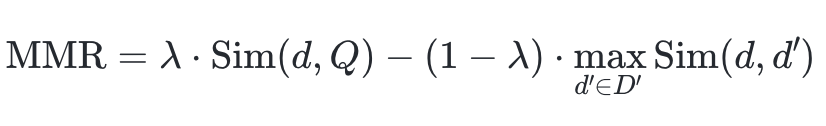

여기서 -
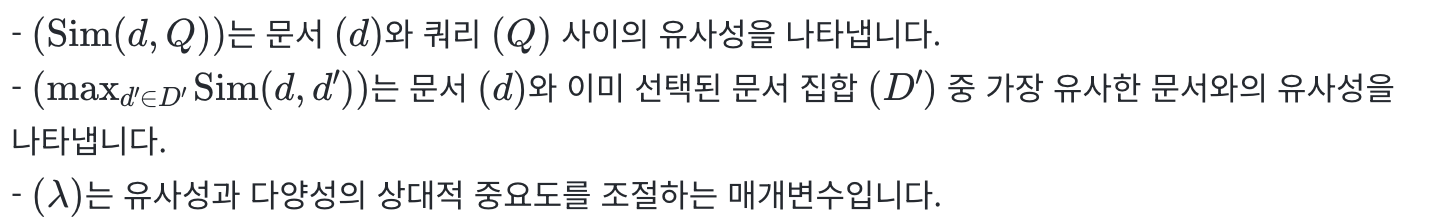



<주요 매개변수>
- query: 사용자로부터 입력받은 검색 쿼리.
- k: 최종적으로 선택할 문서의 수. 이 매개변수는 반환할 문서의 총 개수를 결정.
- fetch_k: MMR 알고리즘을 수행할 때 고려할 상위 문서의 수. 이는 초기 후보 문서 집합의 크기를 의미하며, 이 중에서 MMR에 의해 최종 문서가 k개 만큼 선택됨.
- lambda_mult: 쿼리와의 유사성과 선택된 문서 간의 다양성 사이의 균형을 조절. 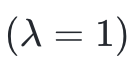
은 유사성만 고려하며, 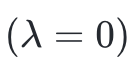
은 다양성만을 최대화한다.

In [47]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 79.1 MB/s eta 0:00:00


In [48]:
# Load data -> Text split

from langchain_community.document_loaders import PyMuPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

loader = PyMuPDFLoader('/content/SPRI_AI_Brief_2023년12월호_F.pdf')
data = loader.load()
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000,
    chunk_overlap=200,
    encoding_name='cl100k_base'
)

documents = text_splitter.split_documents(data)
len(documents)

40

- OpenAIEmbeddings 클래스를 사용하여 임베딩 모델의 인스턴스를 생성
- Chroma.from_documents 메소드를 사용하여 분할된 문서들을 임베딩
- Chroma 벡터 저장소에 저장. esg라는 컬렉션 이름을 사용하며, 데이터는 ./db/chromadb 디렉토리에 저장
- collection_metadata를 통해 유사도 검색에 사용될 공간('hnsw:space')을 'cosine'으로 지정하여, 코사인 유사도를 사용

In [49]:
# Embedding -> Upload to Vectorstore
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()
db2 = Chroma.from_documents(
    documents,
    embeddings_model,
    collection_name = 'esg',
    persist_directory = './db/chromadb',
    collection_metadata = {'hnsw:space': 'cosine'}, # l2 is the default
)

db2

이 과정을 통해, pdf 문서의 텍스트를 추출하고, 이를 의미적으로 응집력 있는 조각으로 분할 한 뒤, 각 조각을 백테로 변환하여 Chroma 벡터 저장소에 저장한다.

1. 일반적인 유사도 기반 검색



In [50]:
query = '삼성 가우스에 대해 설명해주세요'
docs = db2.similarity_search(query)
print(len(docs))
print(docs[0].page_content)

4
SPRi AI Brief |  
2023-12월호
10
삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개
n 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 
AI 모델 ‘삼성 가우스’를 공개
n 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 
삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유
KEY Contents
£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원
n 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 
‘삼성 가우스’를 최초 공개
∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 
최적화된 크기의 모델 선택이 가능
∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, 
온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유
∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며, 생성 AI 모델을 다양한 제품에 
단계적으로 탑재할 계획
n 삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는 
이미지 모델의 3개 모델로 구성
∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며, 메일 작성, 문서 요약, 번역 업무의 
처리를 지원
∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이(code.i)’는 대화형 인터페이스로 서비스를 제공하며 
사내 소프트웨어 개발에 최적화
∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원하는 대로 바꿀 수 있도록 지원하며 
저해상도 이미지의 고해상도 전환도 지원
n IT 전문지 테크리퍼블릭(TechRepublic)은 온디바이스 AI가 주요 기술 트렌드로 부상했다며, 
2024년부터 가우스를 탑재한 삼성 스마트폰이 메타의 라마(

In [51]:
print(docs[-1].page_content)

£ AI 에이전트가 의료와 교육, 생산성, 엔터테인먼트·쇼핑 영역의 서비스 대중화를 주도할 것
n 에이전트로 인해 주목할 만한 변화는 고비용 서비스의 대중화로 특히 △의료 △교육 △생산성 △
엔터테인먼트·쇼핑의 4개 영역에서 대규모 변화 예상
∙(의료) 에이전트가 환자 분류를 지원하고 건강 문제에 대한 조언을 제공하며 치료의 필요 여부를 결정하면서 
의료진의 의사결정과 생산성 향상에 기여
∙(교육) 에이전트가 1대 1 가정교사의 역할을 맡아 모든 학생에게 평등한 교육 기회를 제공할 수 있으며, 
아이가 좋아하는 게임이나 노래 등을 활용해 시청각 기반의 풍부한 맞춤형 교육 경험을 제공
∙(생산성) 사용자의 아이디어를 기반으로 에이전트가 사업계획과 발표 자료 작성, 제품 이미지 생성을 
지원하며, 임원의 개인 비서와 같은 역할도 수행 
∙(엔터테인먼트·쇼핑) 쇼핑 시 에이전트가 모든 리뷰를 읽고 요약해 최적의 제품을 추천하고 사용자 대신 
주문할 수 있으며 사용자의 관심사에 맞춤화된 뉴스와 엔터테인먼트를 구독 가능
☞ 출처 : GatesNotes, AI is about to completely change how you use computers, 2023.11.09.


2. MMR 검색

  하나의 주제에 대해 다루는 문서가 여러 개 있는 경우, 이러한 문서들 중에서 서로 다른 내용을 담고 있는 문서들을 선별하여 반환

In [52]:
mmr_docs = db2.max_marginal_relevance_search(query, k=4, fetch_k=10)
print(len(mmr_docs))
print(mmr_docs[0].page_content)

4
SPRi AI Brief |  
2023-12월호
10
삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개
n 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 
AI 모델 ‘삼성 가우스’를 공개
n 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 
삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유
KEY Contents
£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원
n 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 
‘삼성 가우스’를 최초 공개
∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 
최적화된 크기의 모델 선택이 가능
∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, 
온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유
∙삼성전자는 삼성 가우스를 활용한 온디바이스 AI 기술도 소개했으며, 생성 AI 모델을 다양한 제품에 
단계적으로 탑재할 계획
n 삼성 가우스는 △텍스트를 생성하는 언어모델 △코드를 생성하는 코드 모델 △이미지를 생성하는 
이미지 모델의 3개 모델로 구성
∙언어 모델은 클라우드와 온디바이스 대상 다양한 모델로 구성되며, 메일 작성, 문서 요약, 번역 업무의 
처리를 지원
∙코드 모델 기반의 AI 코딩 어시스턴트 ‘코드아이(code.i)’는 대화형 인터페이스로 서비스를 제공하며 
사내 소프트웨어 개발에 최적화
∙이미지 모델은 창의적인 이미지를 생성하고 기존 이미지를 원하는 대로 바꿀 수 있도록 지원하며 
저해상도 이미지의 고해상도 전환도 지원
n IT 전문지 테크리퍼블릭(TechRepublic)은 온디바이스 AI가 주요 기술 트렌드로 부상했다며, 
2024년부터 가우스를 탑재한 삼성 스마트폰이 메타의 라마(

In [53]:
print(mmr_docs[-1].page_content)

1. 정책/법제  
2. 기업/산업 
3. 기술/연구 
 4. 인력/교육
갈릴레오의 LLM 환각 지수 평가에서 GPT-4가 가장 우수
n 주요 LLM의 환각 현상을 평가한 ‘LLM 환각 지수’에 따르면 GPT-4는 작업 유형과 관계없이 
가장 우수한 성능을 보였으며 GPT-3.5도 거의 동등한 성능을 발휘
n 오픈소스 모델 중에서는 메타의 라마2가 RAG 없는 질문과 답변 및 긴 형식의 텍스트 
생성에서 가장 우수한 성능을 발휘
KEY Contents
£ 주요 LLM 중 GPT-4가 가장 환각 현상 적고 GPT-3.5 터보도 비슷한 성능 기록
n 머신러닝 데이터 관리 기업 갈릴레오(Galileo)가 2023년 11월 15일 주요 LLM의 환각 현상을 평가한 
‘LLM 환각 지수(LLM Hallucination Index)’를 발표
∙생성 AI의 환각 현상은 AI 시스템이 잘못된 정보를 생성하거나, 현실과 다른 부정확한 결과를 내놓는 
현상으로, 기업의 AI 도입을 가로막는 주요 장애물이며, 환각 지수는 신뢰할 수 있는 생성 AI 구축을 위해 
환각을 평가하고 측정하는 구조화된 접근방식을 제공
∙환각 지수는 △검색 증강 생성(Retrieval-Augmented Generation, RAG)*을 포함한 질문과 답변 △RAG 
없는 질문과 답변 △긴 형식의 텍스트(보고서나 기사, 에세이) 생성의 3개 작업 유형에 대하여 환각을 
기준으로 LLM의 순위를 평가
* 기존에 학습된 데이터가 아닌 외부 소스(데이터셋, 데이터베이스, 문서 등)에서 가져온 정보를 검색해 활용하는 기술
n 3개의 작업 유형 평가 전체에서 오픈AI의 GPT-4가 최고의 성능을 기록했으며, GPT-3.5 터보도 
GPT-4와 거의 동등한 성능을 발휘
∙메타의 라마2(Llama-2-70b)는 RAG 없는 질문과 답변 유형에서 오픈소스 모델 가운데 가장 우수했고 긴 
형식의 텍스트 생성에서도 GPT-4에 준하는 성능을 기록했으나, RAG 포함 질문과 답변에서는 허깅 
페이스의  제퍼(Zephyr-7b

### 벡터스토어에 메타데이터 추가

1.  메타데이터를 포함하여 문서 준비




In [54]:
from langchain_core.documents import Document

documents = [
    Document(
        page_content="LangChain은 대규모 언어 모델(LLM)을 사용하는 애플리케이션을 개발하기 위한 프레임워크입니다.",
        metadata={
            "title": "LangChain 소개",
            "author": "AI 개발자",
            "url": "http://example.com/langchain-intro"
        }
    ),
    Document(
        page_content="벡터 데이터베이스는 고차원 벡터를 효율적으로 저장하고 검색하는 데 특화된 데이터베이스 시스템입니다.",
        metadata={
            "title": "벡터 데이터베이스 개요",
            "author": "데이터 과학자",
            "url": "http://example.com/vector-db-overview"
        }
    )
    # 추가 문서들...
]

2. Chroma 벡터 스토어에 문서와 메타데이터 저장

  from_documents 메서드를 사용하여 문서와 메타데이터 함께 저장


In [55]:
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

# OpenAI 임베딩 모델 초기화
embedding_model = OpenAIEmbeddings()

# Chroma 벡터 스토어에 문서와 메타데이터 저장
vectorstore = Chroma.from_documents(
    documents=documents,
    embedding=embedding_model,
    persist_directory="./chroma_db"  # 벡터 스토어를 디스크에 저장
)

3. 유사성 검색 수행 및 메타데이터 활용


In [56]:
query = "LangChain이란 무엇인가요?"
results = vectorstore.similarity_search(query, k=2)

for doc in results:
    print(f"내용: {doc.page_content}")
    print(f"제목: {doc.metadata['title']}")
    print(f"저자: {doc.metadata['author']}")
    print(f"URL: {doc.metadata['url']}")
    print("---")

내용: LangChain은 대규모 언어 모델(LLM)을 사용하는 애플리케이션을 개발하기 위한 프레임워크입니다.
제목: LangChain 소개
저자: AI 개발자
URL: http://example.com/langchain-intro
---
내용: 벡터 데이터베이스는 고차원 벡터를 효율적으로 저장하고 검색하는 데 특화된 데이터베이스 시스템입니다.
제목: 벡터 데이터베이스 개요
저자: 데이터 과학자
URL: http://example.com/vector-db-overview
---


## FAISS

Facebook AI Research에 의해 개발된 라이브러리로, 대규모 벡터 데이터셋에서 유사도 검색을 빠르고 효율적으로 수행할 수 있게 해준다. 특히 벡터의 압축된 표현을 사용하여 메모리 사용량을 최소화하면서도 검색 속도를 극대화하는 특징이 있다.

**<유사도 기준>**
- 'l2' (기본값): 유클리디안 거리를 기반으로 하는 유사도 측정 방법. 두 벡터 간의 거리가 작을수록 더 유사하다고 평가.
- 'ip' (내적): 내적 기반 유사도 측정 방법으로, 두 벡터의 방향성이 얼마나 유사한지를 평기. 값이 클수록 더 유사하다고 판단.
- 'cosine': 코사인 유사도를 기반으로 하는 방법으로, 두 벡터의 각도가 작을수록 (즉, 방향이 더 유사할수록) 더 유사하다고 평가. 내적과 유사하지만, 벡터의 크기에 영향을 받지 않는다.

### 유사도 기반 검색



In [58]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.9 MB/s eta 0:00:00


In [59]:
# 벡터스토어 db 인스턴스를 생성
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores.utils import DistanceStrategy
from langchain_community.embeddings import HuggingFaceEmbeddings

embeddings_model = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sbert-nli',
    model_kwargs={'device':'cpu'},
    encode_kwargs={'normalize_embeddings':True},
)


vectorstore = FAISS.from_documents(documents,
                                   embedding = embeddings_model,
                                   distance_strategy = DistanceStrategy.COSINE
                                  )
vectorstore


In [60]:
vectorstore.distance_strategy

<DistanceStrategy.COSINE: 'COSINE'>

1. 쿼리 인코딩 : 주어진 쿼리 문자열을 벡터로 변환한다. 이과정은 vectorstore를 생성할 때 사용된 임베딩 모델을 사용하여 수행된다.

2. 유사도 검색 : 변환된 쿼리 벡터와 벡터 스토어에 저장된 문서 벡터들 간의 유사도를 계산하여, 가장 유사한 문서들을 찾아낸다. 이때 유사도 계산 방법은 vectorstore 생성 시 지정된 distance_strategy에 따라 결정된다.

3. 결과반환

In [61]:
query = 'LangChain이란 무엇인가요?'
docs = vectorstore.similarity_search(query)
print(len(docs))
print(docs[0].page_content)

2
LangChain은 대규모 언어 모델(LLM)을 사용하는 애플리케이션을 개발하기 위한 프레임워크입니다.


### FAISS DB를 로컬에 저장하기

vectorstore.save_local 메서드를 사용하여 로컬 파일 시스템에 벡터 스토어를 저장할 수 있다.
이 메서드는 벡터 스토어의 상태를 지정된 경로에 파일로 저장한다.
저장된 파일은 나중에 불러와서 동일한 벡터 스토어 상태를 재구성하는 데 사용될 수 있다.

In [62]:
# save db
vectorstore.save_local('./db/faiss')

**백터 스토어 불러오기**

FAISS.load_local 클래스 메서드는 저장된 파일 경로와 임베딩 모델을 인자로 받아, 해당 파일로부터 벡터 스토어를 재구성한다.

여기서 embeddings_model은 벡터 스토어와 함께 사용될 임베딩 모델 인스턴스이다.

In [64]:
# load db
db3 = FAISS.load_local('./db/faiss', embeddings_model,allow_dangerous_deserialization=True)

# Retreiver

벡터 저장소에서 문서를 검색하는 도구

## 1. Vector Store Retriver

대량의 텍스트 데이터에서 관련 정보를 효율적으로 검색할 수 있다.

LangChain의 벡터스토어와 임베딩 모델을 사용하여 문서들의 임베딩을 생성하고, 그 후 저장된 임베딩들을 기반으로 검색 쿼리에 가장 관련 있는 문서들을 검색하는 방법을 설명


사전 준비 - 문서 로드 및 분할
- PyMuPDFLoader를 사용하여 pdf에서 텍스트 데이터 로드
- RecursiveCharacterTextSplitter를 사용하여 문서를 텍스트 조각으로 분할하는 인스턴스를 생성
- text_splitter.split_documents(data)를 호출하여 로드된 문서 객체를 여러 개의 청크로 분할


In [65]:
# Load data -> Text split

from langchain_community.document_loaders import PyMuPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings

loader = PyMuPDFLoader('/content/SPRI_AI_Brief_2023년12월호_F.pdf')
data = loader.load()
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000,
    chunk_overlap=200,
    encoding_name='cl100k_base'
)

documents = text_splitter.split_documents(data)
len(documents)

40

In [66]:
!pip install sentence-transformers

**사전 준비 - 문서 임베딩을 벡터스토어에 저장**

In [54]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 5.1 MB/s eta 0:00:00


In [67]:
# 벡터스토어에 문서 임베딩을 저장
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores.utils import DistanceStrategy
from langchain_community.embeddings import HuggingFaceEmbeddings

embeddings_model = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sbert-nli',
    model_kwargs={'device':'cpu'},
    encode_kwargs={'normalize_embeddings':True},
)


vectorstore = FAISS.from_documents(documents,
                                   embedding = embeddings_model,
                                   distance_strategy = DistanceStrategy.COSINE
                                  )



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


**단일 문서 검색**

검색 쿼리를 정의한 후, `as_retriever`메소드를 사용하여 벡터스토어에서 Retriever 객체를 생성한다. `search_kwargs`에서 K:1을 설정하여 가장 유사도가 높은 하나의 문서를 검색한다.

In [68]:
# 검색 쿼리
query = '삼성 가우스에 대해 설명해주세요'

# 가장 유사도가 높은 문장을 하나만 추출
retriever = vectorstore.as_retriever(search_kwargs={'k': 1})

docs = retriever.get_relevant_documents(query)
print(len(docs))
docs[0]


1


<ipython-input-68-53367a8d4145>:7: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 12, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가

**MMR 검색1**

상위 5개의 문서 검색, fetch_k는 후보 집합으로 선택되는 문서의 수를 의미함

lambda_mult 설정은 유사도와 다양성 사이에서 적용될 수준을 의미한다. 0.5를 사용하면 중립적으로 적용하게 된다.

In [69]:
# MMR - 다양성 고려 (lambda_mult = 0.5)
retriever = vectorstore.as_retriever(
    search_type='mmr',
    search_kwargs={'k': 5, 'fetch_k': 20}
)

docs = retriever.get_relevant_documents(query)
print(len(docs))
docs[0]

5


Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 12, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가

**MMR 검색2**

검색 결과의 관련성과 다양성을 균형있게 조정하는 방식

`lambda_mult` 매개 변수는 관련성과 다양성 사이의 균형 조절

0.15인 경우 관련성보다는 다양성을 우선으로 한다

In [70]:
# MMR - 다양성 고려 (lambda_mult 작을수록 더 다양하게 추출)
retriever = vectorstore.as_retriever(
    search_type='mmr',
    search_kwargs={'k': 5, 'lambda_mult': 0.15}
)

docs = retriever.get_relevant_documents(query)
print(len(docs))
docs[-1]


5


Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 21, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='행사명\n행사 주요 개요\nCES 2024\n- 미국 소비자기술 협회(CTA)가 주관하는 세계 최대 가전·IT·소\n비재 전시회로 5G, AR&VR, 디지털헬스, 교통·모빌리티 등 \n주요 카테고리 중심으로 기업들이 최신의 기술 제품군을 전시\n- CTA 사피로 회장은 가장 주목받는 섹터로 AI를 조명하였으며, \n모든 산업을 포괄한다는 의미에서 ‘올 온(All on)’을 주제로 한 \n이번 전시에는 500곳 이상의 한국기업 참가 예정\n기간\n장소 \n홈페이지\n2024.1.9~12\n미국, 라스베가스\nhttps://www.ces.tech/\nAIMLA 2024\n- 머신러닝 및 응용에 관한 국제 컨퍼런스(AIMLA 2024)는 \n인공지능 및 머신러닝의 이론, 방법론 및 실용적 접근에 관한 \n지식과 최신 연구 결과 공유\n- 이론 및 실무 측면에서 인공지능, 기계학습의 주요 분야를 \n논의하고, 학계, 산업계의 연구자와 실무자들에게 해당 분\n야의 최첨단 개발 소식 공유\n기간\n장소 \n홈페이지\n2024.1.27~28\n덴마크, 코펜하겐\nhttps://ccnet2024.org/aimla\n/

**유사도 점수 임계값 기반 검색**

score_threshold 유사도 점수 이상인 문서만을 대상으로 추출

퀴리 문장과 최소한 0.3 이상의 유사도를 가진 문서만을 검색결과로 반환


In [71]:
# Similarity score threshold (기준 스코어 이상인 문서를 대상으로 추출)
retriever = vectorstore.as_retriever(
    search_type='similarity_score_threshold',
    search_kwargs={'score_threshold': 0.3}
)

docs = retriever.get_relevant_documents(query)
print(len(docs))
docs[0]


1


/usr/local/lib/python3.10/dist-packages/langchain_core/vectorstores/base.py:1083: UserWarning: Relevance scores must be between 0 and 1, got [(Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 12, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우

Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 12, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가

**메타데이터 필터링을 사용한 검색**

메타데이터의 특정 필드에 대해 기준을 설정하고 조건을 충족하는 문서만을 필터링하여 검색.

In [72]:
# 문서 객체의 metadata를 이용한 필터링
retriever = vectorstore.as_retriever(
    search_kwargs={'filter': {'format':'PDF 1.4'}}
)

docs = retriever.get_relevant_documents(query)
print(len(docs))
docs[0]


4


Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 12, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='SPRi AI Brief |  \n2023-12월호\n10\n삼성전자, 자체 개발 생성 AI ‘삼성 가우스’ 공개\nn 삼성전자가 온디바이스에서 작동 가능하며 언어, 코드, 이미지의 3개 모델로 구성된 자체 개발 생성 \nAI 모델 ‘삼성 가우스’를 공개\nn 삼성전자는 삼성 가우스를 다양한 제품에 단계적으로 탑재할 계획으로, 온디바이스 작동이 가능한 \n삼성 가우스는 외부로 사용자 정보가 유출될 위험이 없다는 장점을 보유\nKEY Contents\n£ 언어, 코드, 이미지의 3개 모델로 구성된 삼성 가우스, 온디바이스 작동 지원\nn 삼성전자가 2023년 11월 8일 열린 ‘삼성 AI 포럼 2023’ 행사에서 자체 개발한 생성 AI 모델 \n‘삼성 가우스’를 최초 공개\n∙정규분포 이론을 정립한 천재 수학자 가우스(Gauss)의 이름을 본뜬 삼성 가우스는 다양한 상황에 \n최적화된 크기의 모델 선택이 가능\n∙삼성 가우스는 라이선스나 개인정보를 침해하지 않는 안전한 데이터를 통해 학습되었으며, \n온디바이스에서 작동하도록 설계되어 외부로 사용자의 정보가 유출되지 않는 장점을 보유\n∙삼성전자는 삼성 가

1. 검색 (Retrieval): vectorstore.as_retriever를 사용하여 MMR(Maximal Marginal Relevance) 검색 방식으로 문서를 검색합니다. search_kwargs에 k: 5와 lambda_mult: 0.15를 설정하여 상위 5개의 관련성이 높으면서도 다양한 문서를 선택합니다.

2. 프롬프트 생성 (Prompt): ChatPromptTemplate를 사용하여 쿼리에 대한 답변을 생성하기 위한 템플릿을 정의합니다. 여기서 {context}는 검색된 문서의 내용이고, {question}은 사용자의 쿼리입니다.

3. 모델 (Model): ChatOpenAI를 사용하여 OpenAI의 GPT 모델을 초기화합니다. 이 예에서는 'gpt-3.5-turbo-0125' 모델을 사용하며, temperature를 0으로 설정하여 결정론적인 응답을 생성하고, max_tokens를 500으로 설정하여 응답의 길이를 제한합니다.

4. 문서 포맷팅 (Formatting Docs): 검색된 문서(docs)를 포맷팅하는 format_docs 함수를 정의합니다. 이 함수는 각 문서의 page_content를 가져와 두 개의 문단 사이에 두 개의 줄바꿈을 삽입하여 문자열로 결합합니다.

5. 체인 실행 (Chain Execution): prompt | llm | StrOutputParser()를 사용하여 LLM 체인을 구성하고 실행합니다. 프롬프트를 통해 정의된 쿼리를 모델에 전달하고, 모델의 응답을 문자열로 파싱합니다.

6. 실행 (Run): chain.invoke 메서드를 사용하여 체인을 실행합니다. context로는 포맷팅된 문서 내용이고, question은 사용자의 쿼리입니다. 최종 응답은 response 변수에 저장됩니다.

In [73]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

retriever = vectorstore.as_retriever(
    search_type='mmr',
    search_kwargs = {'k':5, 'lambda_mult':0.15}
)

docs = retriever.get_relevant_documents(query)

#prompt
template = '''Answer the question based only on the following context:
{context}

Question: {question}
'''

prompt = ChatPromptTemplate.from_template(template)

# Model
llm = ChatOpenAI(
    model = 'gpt-4o-mini',
    temperature = 0,
    max_tokens = 500,
)

def format_docs(docs):
  return '\n\n'.join([d.page_content for d in docs])


#chain
chain = prompt | llm | StrOutputParser()

# Run
response = chain.invoke({'context':(format_docs(docs)),'question':query})

response

"삼성 가우스는 삼성전자가 자체 개발한 생성 AI 모델로, 언어, 코드, 이미지의 3개 모델로 구성되어 있습니다. 이 모델은 온디바이스에서 작동 가능하며, 사용자 정보가 외부로 유출될 위험이 없다는 장점을 가지고 있습니다. 삼성전자는 2023년 11월 8일 열린 '삼성 AI 포럼 2023'에서 삼성 가우스를 최초 공개하였으며, 다양한 제품에 단계적으로 탑재할 계획입니다.\n\n삼성 가우스는 다음과 같은 세 가지 모델로 구성됩니다:\n1. **언어 모델**: 메일 작성, 문서 요약, 번역 등의 작업을 지원하며, 클라우드와 온디바이스에서 다양한 모델로 구성됩니다.\n2. **코드 모델**: AI 코딩 어시스턴트인 '코드아이(code.i)'를 통해 대화형 인터페이스로 서비스를 제공하며, 사내 소프트웨어 개발에 최적화되어 있습니다.\n3. **이미지 모델**: 창의적인 이미지를 생성하고 기존 이미지를 원하는 대로 변경할 수 있으며, 저해상도 이미지를 고해상도로 전환하는 기능도 지원합니다.\n\n삼성 가우스는 정규분포 이론을 정립한 수학자 가우스의 이름을 따서 명명되었으며, 다양한 상황에 최적화된 크기의 모델 선택이 가능합니다. 이 모델은 안전한 데이터를 통해 학습되었으며, 라이선스나 개인정보를 침해하지 않는 방식으로 개발되었습니다."

## Multi Query Retriever

벡터스토어 검색도구(Vector Store Retriever)의 한계를 극복하기 위해 고안된 방법으로 용자가 입력한 쿼리의 의미를 다각도로 포착하여 검색 효율성을 높이고, LLM을 활용하여 사용자에게 보다 관련성 높고 정확한 정보를 제공하는 것을 목표함.

다양한 문장을 생성하기 위하여 LLM을 사용하여 사용자의 입력 문장을 다양한 관점으로 패러프레이징(Paraphrasing)하는 방식으로 구현

1. MultiQueryRetriever 설정 : from_llm 메서드를 통해, 기존 벡터저장소 검색도구(vectorstore.as_retriever())와 LLM 모델(llm)을 결합하여 MultiQueryRetriever 인스턴스 생성

2. 로깅 설정 : 로깅을 설정하여 MultiQueryRetriever에 의해 생성되고 실행되는 쿼리들에 대한 정보를 로그로 기록하고 확인할 수 있음.

3. 문서 검색 실행: get_relevant_documents 메서드를 사용하여 주어진 사용자 쿼리(question)에 대해 멀티 쿼리 기반의 문서 검색을 실행. 생성된 모든 쿼리에 대해 문서를 검색하고, 중복을 제거하여 고유한 문서들만을 결과로 반환

4. 결과 확인 : 검색을 통해 반환된 고유 문서들의 수를 확인. 멀티 쿼리 접근 방식을 통해 얼마나 많은 관련 문서가 검색되었는지를 나타냄.


In [74]:
# 멀티 쿼리 생성
from langchain.retrievers.multi_query import MultiQueryRetriever

question = '미래의 AI 소프트웨어 매출 전망은 어떻게 되나요?'

llm = ChatOpenAI(
    model='gpt-3.5-turbo-0125',
    temperature=0,
    max_tokens=500,
)

retriever_from_llm = MultiQueryRetriever.from_llm(
    retriever=vectorstore.as_retriever(), llm=llm
)

# Set logging for the queries
import logging

logging.basicConfig()
logging.getLogger('langchain.retrievers.multi_query').setLevel(logging.INFO)

unique_docs = retriever_from_llm.get_relevant_documents(query=question)
len(unique_docs)

INFO:langchain.retrievers.multi_query:Generated queries: ['1. AI 소프트웨어의 미래 매출 전망은 무엇인가요?', '2. AI 소프트웨어의 매출이 어떻게 예상되고 있나요?', '3. 미래에 AI 소프트웨어의 매출이 어떻게 변화할 것으로 예상되나요?']


7

In [75]:
unique_docs[1]

Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 14, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='연평균 성장률은 32.6%로 시장 전체를 웃돌 전망\n∙애플리케이션 개발, 소프트웨어 품질과 수명주기 관리 소프트웨어, 애플리케이션 플랫폼을 포함하는 AI \nAD&D는 향후 5년간 카테고리 중 가장 높은 38.7%의 연평균 성장률이 예상됨\nn IDC에 따르면 경제적 불확실성과 시장 역학의 변화에도 AI와 자동화 기술에 대한 기업들의 투자 \n의지는 확고하며, 기업들은 AI 도입이 사업 성공과 경쟁우위에 필수적이라고 인식\n∙IDC 설문조사에 따르면 향후 12개월 동안 응답자의 3분의 1은 기업이 특정 사용 사례나 응용 영역에서 \n외부 AI 소프트웨어의 구매를 고려하거나 외부 AI 소프트웨어와 내부 자원의 결합을 고려\nn 한편, AI 소프트웨어 시장에 포함되지 않는 생성 AI 플랫폼과 애플리케이션은 2027년까지 283억 \n달러의 매출을 창출할 전망 \n☞ 출처 : IDC, IDC Forecasts Revenue for Artificial Intelligence Software Will Reach $279 Billion Worldwide in \n2027, 2023.10.31.')

retriever_from_llm을 활용하여 여러 쿼리를 생성하고 검색된 문서를 기반으로 사용자 질문에 답변하는 과정

1. 프롬프트 설정 : 사용자의 질문에 대한 답변을 생성하기 위한 프롬프트 템플릿 정의. 여기서 {context}는 검색된 문서의 내용을 나타내고, {question}은 사용자의 질문이다.

2. 모델 초기화 :  ChatOpenAI 클래스를 사용하여 모델 초기화. temperature를 0으로 설정하여 일관된 답변을 생성

3. 문서 포맷팅 함수 정의 : 검색된 문서들을 하나의 문자열로 포맷팅하는 함수를 정의. 각 문서 내용을 두개의 줄바꿈으로 구분하여 결합

4. 체인 정의 및 실행 : RunnablePassthrough를 사용하여 사용자의 질문을 그대로 전달. 이후 검색된 문서(context)와 사용자의 질문(question)을 prompt에 전달하고, 생성된 프롬프트를 모델에 입력으로 제공. StrOutputParser를 사용하여 모델의 출력을 문자열로 파싱

5. 실행 및 응답 생성 :  chain.invoke 메서드를 호출하여 전체 프로세스를 실행.

In [76]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough


# Prompt
template = '''Answer the question based only on the following context:
{context}

Question: {question}
'''

prompt = ChatPromptTemplate.from_template(template)

# Model
llm = ChatOpenAI(
    model='gpt-4o-mini',
    temperature=0,
)

def format_docs(docs):
    return '\n\n'.join([d.page_content for d in docs])

# Chain
chain = (
    {'context': retriever_from_llm | format_docs, 'question': RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

# Run
response = chain.invoke('미래의 AI 소프트웨어 매출 전망을 요약해서 알려주세요.')
response

INFO:langchain.retrievers.multi_query:Generated queries: ['1. AI 소프트웨어의 미래 매출 전망에 대한 간략한 요약을 알려주세요.', '2. 미래에 예상되는 AI 소프트웨어의 매출에 대한 요약 정보를 제공해 주세요.', '3. AI 소프트웨어의 매출 전망을 간단히 설명해 주실 수 있나요?']


'미래의 AI 소프트웨어 매출 전망에 따르면, IDC는 AI 소프트웨어 시장이 2022년 640억 달러에서 2027년 2,510억 달러로 성장할 것으로 예상하며, 연평균 성장률은 31.4%에 이를 것으로 보입니다. 이 중 AI 애플리케이션은 2023년 전체 매출의 약 3분의 1을 차지하며, 2027년까지 21.1%의 연평균 성장률을 기록할 전망입니다. 생성 AI 플랫폼과 애플리케이션은 2027년까지 283억 달러의 매출을 창출할 것으로 예상됩니다.'

## Contextual Compression

컨텍스트 압축 기법은 검색된 문서 중에서 쿼리와 관련된 정보만을 추출하여 반환하는 것을 목표로 함.
쿼리와 무관한 정보를 제거하는 방식으로 답변의 품질을 높이고 비용을 줄일 수 있다.

### 기본 검색기 정의
1. 기본 검색기(Base Retriever) 설정

  vectorstore.as_retriever 함수를 사용하여 기본 검색기를 설정
  
  search_type='mmr'와 search_kwargs={'k':7, 'fetch_k': 20}는 검색 방식을 설정

  mmr 검색 방식은 다양성을 고려한 검색 결과를 제공하여, 단순히 가장 관련성 높은 문서만 반환하는 대신 다양한 관점에서 관련된 문서들을 선택

2. 쿼리 처리 및 문서 검색

  base_retriever.get_relevant_documents(question) 함수를 사용하여 주어진 쿼리에 대한 관련 문서 검색. 쿼리와 관련성 높은 문서들을 반환

3. 결과 출력


In [77]:
# 기본 검색기

question = '미래의 AI 소프트웨어 매출 전망은 어떻게 되나요?'

llm = ChatOpenAI(
    model='gpt-4o-mini',
    temperature=0,
    max_tokens=500,
)

base_retriever = vectorstore.as_retriever(
                                search_type='mmr',
                                search_kwargs={'k':7, 'fetch_k': 20})

docs = base_retriever.get_relevant_documents(question)
print(len(docs))

7


### 문서 압축기의 구성과 작동 방식

기본 검색기로부터 얻은 문서들을 더욱 효율적으로 압축하여, 쿼리와 가장 관련이 깊은 내용만을 추려내는 것을 목표로 함. LLMChainExtractor와 ContextualCompressionRetriever 클래스를 사용

1. LLMChainExtractor 설정

  LLMChainExtractor.from_llm(llm)를 사용하여 문서 압축기 설정. 언어모델을 사용하여 문서 내용 압축

2. ContextualCompressionRetriever 설정

  ContextualCompressionRetriever 인스턴스를 생성할 때, base_compressor와 base_retriever를 인자로 제공

  base_compressor는 앞서 설정한 LLMChainExtractor 인스턴스이며, base_retriever는 기본 검색기 인스턴스이다.

  이 두 구성 요소를 결합하여 검색된 문서들을 압축하는 과정을 처리한다.

3. 압축된 문서 검색

  compression_retriever.get_relevant_documents(question) 함수를 사용하여 주어진 쿼리에 대한 압축된 문서들을 검색. 기본 검색기를 통해 얻은 문서들을 문서 압축기를 사용하여 내용을 압축하고, 쿼리와 가장 관련된 내용만을 추려낸다.

4. 결과출력

In [78]:
# 문서 압축기를 연결하여 구성

from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=base_retriever
)

compressed_docs = compression_retriever.get_relevant_documents(question)
print(len(compressed_docs))

2


In [79]:
compressed_docs

[Document(metadata={'source': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'file_path': '/content/SPRI_AI_Brief_2023년12월호_F.pdf', 'page': 14, 'total_pages': 23, 'format': 'PDF 1.4', 'title': '', 'author': 'dj', 'subject': '', 'keywords': '', 'creator': 'Hwp 2018 10.0.0.13462', 'producer': 'Hancom PDF 1.3.0.542', 'creationDate': "D:20231208132838+09'00'", 'modDate': "D:20231208132838+09'00'", 'trapped': ''}, page_content='n IDC의 예측에 의하면 AI 소프트웨어 시장은 2027년 2,510억 달러로 달할 전망이며, 생성 AI 플랫폼과 애플리케이션은 2027년까지 283억 달러의 매출을 창출할 전망  \nn 2023년 기준 AI 소프트웨어 매출의 3분의 1을 차지하는 최대 시장인 AI 애플리케이션은 2027년까지 21.1%의 연평균 성장률을 기록할 전망  \nn 시장조사기관 IDC는 AI 소프트웨어 시장이 2022년 640억 달러에서 2027년 2,510억 달러로 연평균 성장률 31.4%를 기록하며 급성장할 것으로 예상  \n∙AI 소프트웨어 시장은 AI 플랫폼, AI 애플리케이션, AI 시스템 인프라 소프트웨어(SIS), AI 애플리케이션 개발·배포(AI AD&D) 소프트웨어를 포괄  \n∙AI 애플리케이션은 AI 소프트웨어의 최대 시장으로 2023년 전체 매출의 약 3분의 1을 차지하며 2027년까지 21.1%의 연평균 성장률을 기록할 전망  \n∙AI 비서를 포함한 AI 모델과 애플리케이션의 개발을 뒷받침하는 AI 플랫폼은 두 번째로 시장 규모가 큰 분야로, 2027년까지 35.8%의 연평균 성장률이 예상됨  \n

참고 : https://wikidocs.net/231364
